##### <div style="text-align: right; font-family:Georgia;"> ***Sam VALLET et Thomas SINAPI*** </div>
## <center><span style="font-family:Georgia; font-size:3em;"> **Projet IAS** </span></center>


In [643]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import fuzz


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


***
## **PRE PROCESSING :** ##
***

### **Premier dataset :** *"english_premier_league_data.csv" dont on conserve toutes les features statistiques* ###

In [644]:
df1 = pd.read_csv('Result_dataset/english_premier_league_data.csv', sep=';')
df1 = df1[df1['year'].isin([2016, 2017, 2018, 2019, 2020])] # on se restreint à ces années 
df1 = df1.rename(columns={'year': 'season'})
df1 = df1.drop(["Score","Half Time Score"], axis = 1)
df1 = df1.rename(columns={'Home Team Goals Scored': 'HT Goals Scored', 'Away Team Goals Scored': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'Home Team Goals Conceeded': 'HT Goals Conceeded', 'Away Team Goals Conceeded': 'AT Goals Conceeded',
                          'Home Team Rating': 'HT Rating', 'Away Team Rating': 'AT Rating', 
                          'Home Team Possession %': 'HT Posses %', 'Away Team Possession %': 'AT Posses %',
                          'Home Team Off Target Shots': 'HT OffT Shots', 'Away Team Off Target Shots': 'AT OffT Shots',
                          'Home Team On Target Shots': 'HT OnT Shots', 'Away Team On Target Shots': 'AT OnT Shots',
                          'Home Team Total Shots': 'HT TotShots', 'Away Team Total Shots': 'AT TotShots',
                          'Home Team Blocked Shots': 'HT Block Shots', 'Away Team Blocked Shots': 'AT Block Shots',
                          'Home Team Corners': 'HT Corners', 'Away Team Corners': 'AT Corners',
                          'Home Team Throw Ins': 'HT Throw Ins', 'Away Team Throw Ins': 'AT Throw Ins',
                          'Home Team Pass Success %': 'HT Pass %', 'Away Team Pass Success %': 'AT Pass %',
                          'Home Team Aerials Won': 'HT Aerials Won', 'Away Team Aerials Won': 'AT Aerials Won',
                          'Home Team Clearances': 'HT Clear', 'Away Team Clearances': 'AT Clear',
                          'Home Team Fouls': 'HT Fouls', 'Away Team Fouls': 'AT Fouls',
                          'Home Team Second Yellow Cards': 'HT SecYellowC', 'Away Team Second Yellow Cards': 'AT SecYellowC',
                          'Home Team Red Cards': 'HT RedC', 'Away Team Red Cards': 'AT RedC',
                          'Home Team Yellow Cards': 'HT YellowC', 'Away Team Yellow Cards': 'AT YellowC',
                          })


df1.head()

,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season
760,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016
761,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016
762,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016
763,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016
764,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016


***
### **Second dataset :** *"spi_matches.csv" dont on extrait certains features* ###

In [645]:
df2 = pd.read_csv('SPI_dataset/spi_matches.csv', sep=';')

df2.dropna()

ligues = ['Barclays Premier League']
df2 = df2[df2['league'].isin(ligues)] # que la Premier League

df2 = df2[df2['season'].isin([2016, 2017, 2018, 2019, 2020])] #on se retreint à ces années
df2 = df2.rename(columns={'team1': 'Home Team', 'team2': 'Away Team', # on renomme les features comme df
                          'score1': 'HT Goals Scored', 'score2': 'AT Goals Scored', # pour gagner de la place on remplace "HT" -> "HT" et "Away Team" -> "AT"
                          'xg1': 'HT xG', 'xg2': 'AT xG',
                          'nsxg1': 'HT NSxG', 'nsxg2': 'AT NSxG',
                          'spi1': 'HT SPI Rate', 'spi2': 'AT SPI Rate',
                          'prob1': 'HT ProbWin', 'prob2': 'AT ProbWin',
                          'proj_score1': 'HT ProjScore', 'proj_score2': 'AT ProjScore',
                          'adj_score1': 'HT AdjScore', 'adj_score2': 'AT AdjScore',
                          'importance1': 'HT Importance', 'importance2': 'AT Importance',
                          })

df2 = df2.drop(['league_id', 'league'], axis = 1)


df2.head()



,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,Hull,Leicester,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,Burnley,Swansea,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


In [646]:
data_set_1 = df1["Away Team"].unique() #liste des équipes de df1 sans doublons
data_set_2 = df2["Away Team"].unique() #liste des équipes de df2 sans doublons

In [647]:
fuzz.WRatio("TOTTENHAM","Tottenham Hotspur") # etudie la correspondance des string

90

In [648]:
# on veut identifier les noms d'equipes dans chaque dataframe pour que le merge se fasse correctement
def create_team_dict(data_set_1, data_set_2): #cree dictionnaire avec {nom dataset2 : nom dataset1}
    team_dict = {}
    for team2 in data_set_2:
        for team1 in data_set_1:
            ratio = fuzz.WRatio(team1, team2)
            if ratio >= 87: # ratio de 87 assure la correspondance pour CE dataset
                team_dict[team2] = team1
    return team_dict


In [649]:
team_names = create_team_dict(data_set_1,data_set_2)
df2['Home Team'] = df2['Home Team'].replace(team_names) # remplace nom dataset2 par nom dataset1 
df2['Away Team'] = df2['Away Team'].replace(team_names)
df2.head()

,season,date,Home Team,Away Team,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT Goals Scored,AT Goals Scored,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
13,2016,2016-08-13,EVERTON,TOTTENHAM,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
15,2016,2016-08-13,HULL CITY,LEICESTER CITY,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
17,2016,2016-08-13,SOUTHAMPTON,WATFORD,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
18,2016,2016-08-13,CRYSTAL PALACE,WEST BROM,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
19,2016,2016-08-13,BURNLEY,SWANSEA,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05


***
### **FUSION DES DEUX DATAFRAMES** ###

In [650]:
# on merge par le score,les couples d'équipes et l'année 
# ON A DONC NOTRE DATAFRAME PROPRE

df = pd.merge(df1, df2, on=['season', 'Home Team', 'Away Team','HT Goals Scored', 'AT Goals Scored']) 
df.head()


,Home Team,Away Team,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,date,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore
0,HULL CITY,LEICESTER CITY,5.9,6.7,5.4,50,50,7.0,5.0,14.0,2.0,5.0,23.0,76.0,19.0,29.0,8.0,2.0,0.0,0.0,9.0,5.0,18.0,4.0,3.0,16.0,78.0,18.0,15.0,17.0,2.0,0.0,0.0,2,1,1,2,2016,2016-08-13,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05
1,EVERTON,TOTTENHAM,4.9,7.0,6.4,42,58,4.0,6.0,12.0,2.0,5.0,21.0,73.0,16.0,40.0,10.0,0.0,0.0,0.0,4.0,4.0,13.0,5.0,6.0,42.0,80.0,10.0,22.0,14.0,0.0,0.0,0.0,1,1,1,1,2016,2016-08-13,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05
2,MIDDLESBROUGH,STOKE,4.5,6.4,6.2,46,54,6.0,2.0,12.0,4.0,9.0,20.0,75.0,22.0,20.0,18.0,3.0,0.0,0.0,9.0,1.0,12.0,2.0,6.0,23.0,79.0,27.0,16.0,14.0,5.0,0.0,0.0,1,1,1,1,2016,2016-08-13,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,33.9,32.5,1.40,0.55,1.13,1.06,1.05,1.05
3,BURNLEY,SWANSEA,4.0,5.1,7.9,47,53,5.0,3.0,10.0,2.0,7.0,41.0,71.0,20.0,16.0,10.0,3.0,0.0,0.0,6.0,9.0,17.0,2.0,4.0,13.0,78.0,32.0,49.0,14.0,2.0,0.0,0.0,0,1,1,0,2016,2016-08-13,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,36.5,29.1,1.24,1.84,1.71,1.56,0.00,1.05
4,SOUTHAMPTON,WATFORD,4.6,7.0,6.1,64,36,10.0,6.0,24.0,8.0,6.0,25.0,85.0,9.0,21.0,8.0,1.0,0.0,0.0,4.0,1.0,5.0,0.0,2.0,12.0,69.0,19.0,36.0,12.0,2.0,0.0,1.0,1,1,1,1,2016,2016-08-13,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,34.1,30.7,1.05,0.22,1.52,0.41,1.05,1.05


In [651]:
print( "Nombre de matchs :", df.shape[0] )
print( "Nombre de features :", df.shape[1] )

Nombre de matchs : 1900
Nombre de features : 54


***IDENTIFICATION DES VALEURS MANQUANTES***


In [652]:
# df_copy = df.copy()

# # supprimer les valeurs manquantes
# df.dropna(inplace=True)

# # identifier les lignes supprimées
# deleted_rows = df_copy[~df_copy.isin(df)].dropna(how='all')
# print("Les lignes supprimées sont:")
# print(deleted_rows)


*(les valeurs manquantes proviennent uniquement des features "Importance" on peut donc les remplacer par la moyenne)*

In [653]:
# créer une copie du dataframe original
meanHTI = df["HT Importance"].mean()
meanATI = df["AT Importance"].mean()

df["HT Importance"] = df["HT Importance"].fillna(meanHTI)
df["AT Importance"] = df["AT Importance"].fillna(meanATI)


#### ***AJOUT DE COLONNES*** ####
---
*On ajoute une colonne pour l'écart de score de chaque match et l'issue du match.*

In [654]:
df = df.dropna() 
df["Score Difference"] = df["HT Goals Scored"] - df["AT Goals Scored"]  # on renseigne l'ecart de score
df["Match Outcome"] = df["Score Difference"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)) # on renseigne l'issue du match (1/0/-1)

df['MatchWeek'] = (df.index // 10) + 1 # nouvelle colonne qui donne la "journée" du match (semaine)
col_to_move = df.pop('MatchWeek')
df.insert(0, 'MatchWeek', col_to_move)

col_to_move1 = df.pop('date')
df.insert(0, 'date', col_to_move1)
df["date"] = pd.to_datetime(df["date"]) # on convertie le type de "date"

df = df.sort_values("date") # on trie chronologiquement
df = df.round(2) # 2 chiffres après la virgule


*On ajoute à présent une nouvelle colonne pour chaque feature qui correspond à la moyenne de ce feature sur les 3 précédents matchs de chaque équipe.*  
   
***Ceci nous permettra d'avoir des informations supplémentaires sur l'état de forme et la dynamique d'une équipe !***

In [655]:
# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_HA_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:5]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row["HT "+ feature]
        else:
            f_score += row["AT "+ feature]
    return f_score/3

# Fonction pour calculer la valeur moyenne d'un feature lors des 3 derniers matchs pour une équipe (feature de type "HT ..." ou "AT ....")
def get_L3M(df, team, date, match_id, feature):
    previous_matches = df[(df['Home Team'] == team) | (df['Away Team'] == team)]
    previous_matches = previous_matches[previous_matches.index < match_id].sort_values('date', ascending=False).iloc[:5]
    f_score = 0
    for index, row in previous_matches.iterrows():
        if row['Home Team'] == team:
            f_score += row[feature]
        else:
            f_score -= row[feature] # (on fait bien - pour inverser les -1 des victoires à l'extérieur) ou la score difference
    return f_score/3



In [656]:
featuresL3M = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots",  # ON CHOISIT DONC CES FEATURES
                "RedC", "Importance"]
fL3M = ["Match Outcome", "Score Difference"]

# ON APPLIQUE LES FONCTIONS POUR TOUS LES FEATURES

for feature in featuresL3M:
    df["HT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
    df["AT " + feature + " L3M"] = df.apply(lambda x: get_HA_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
for feature in fL3M:
    df["HT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Home Team'], x['date'], x.name, feature), axis=1)
    df["AT " + feature + " L3M"] = df.apply(lambda x: get_L3M(df, x['Away Team'], x['date'], x.name, feature), axis=1)
    

########################################################
# ATTENTION 38 SECONDES POUR L'EXECUTION DE LA CELLULE #
########################################################
    

In [657]:
# #EXEMPLE AVEC LIVERPOOL
# liverpool_matches = df[(df["Home Team"]== "LIVERPOOL") | (df["Away Team"]== "LIVERPOOL") ]
# liverpool_matches[["MatchWeek","Home Team", "Away Team", "Match Outcome", "HT Match Outcome L3M", "AT Match Outcome L3M","Score Difference", "HT Score Difference L3M", "AT Score Difference L3M"]].head(10)# 

In [658]:
# AJOUTE UNE COLONNE POUR LE CLASSEMENT ET POUR LE NOMBRE DE POINTS AVANT ET APRES LE MATCH COURANT

def add_ranking(df):
    # on initialise le classement à 0 pour chaque équipe
    ranking = {team: 0 for team in set(df["Home Team"]).union(set(df["Away Team"]))}
    
    # Trier les matchs par saison et par date
    df = df.sort_values(["season", "date"])
    df["HT Points"] = 0
    df["AT Points"] = 0
    df["HT Rank"] = 0
    df["AT Rank"] = 0
    df["HT Prev Points"] = 0
    df["AT Prev Points"] = 0
    df["HT Prev Rank"] = 0
    df["AT Prev Rank"] = 0
    
    # parcours les matchs
    for i, row in df.iterrows():
        # on stocke les infos avant le match
        home_team = row["Home Team"]
        away_team = row["Away Team"]
        home_points = ranking[home_team]
        away_points = ranking[away_team]
        ranking0 = ranking.copy()
        # on met à jour après le resultat du match
        if row["Match Outcome"] == 1:
            ranking[home_team] += 3
        elif row["Match Outcome"] == 0:
            ranking[home_team] += 1
            ranking[away_team] += 1
        else:
            ranking[away_team] += 3
        
        # on ajoute le nombre de points des équipes et le classement avant le match dans les colonnes correspondantes
        df.at[i, "HT Prev Points"] = home_points
        df.at[i, "AT Prev Points"] = away_points
        
        teams_points = sorted(ranking0.items(), key=lambda x: -x[1])

        ht_rank0 = [i+1 for i, (team, points) in enumerate(teams_points) if team == home_team][0]
        at_rank0 = [i+1 for i, (team, points) in enumerate(teams_points) if team == away_team][0]

        df.at[i, "HT Prev Rank"] = ht_rank0
        df.at[i, "AT Prev Rank"] = at_rank0
        # on ajoute le nombre de points des équipes et le classement après le match dans les colonnes correspondantes

        df.at[i, "HT Points"] = ranking[home_team]
        df.at[i, "AT Points"] = ranking[away_team]

        teams_points = sorted(ranking.items(), key=lambda x: -x[1])
        ht_rank = [i+1 for i, (team, points) in enumerate(teams_points) if team == home_team][0]
        at_rank = [i+1 for i, (team, points) in enumerate(teams_points) if team == away_team][0]
        
        df.at[i, "HT Rank"] = ht_rank
        df.at[i, "AT Rank"] = at_rank
        
        
        # on remet à zéro le classement au début de chaque nouvelle saison
        if i < len(df) - 1 and row["season"] != df.loc[i+1, "season"]:
            ranking = {team: 0 for team in set(df["Home Team"]).union(set(df["Away Team"]))}

    return df

# PERMET D'AVOIR LE CLASSEMENT DU CHAMPOIONNAT POUR UNE SAISON DONNEE

def get_season_ranking(df, season):
    # on filtre la saison
    season_df = df[df["season"] == season]
    
    points_dict = {}
    
    # parcout chaque match de la saison et met à jour les points de chaque équipe
    for index, row in season_df.iterrows():
        home_team = row["Home Team"]
        away_team = row["Away Team"]
        home_points = points_dict.get(home_team, 0)
        away_points = points_dict.get(away_team, 0)
        home_goals = row["HT Goals Scored"]
        away_goals = row["AT Goals Scored"]
        if home_goals > away_goals:
            points_dict[home_team] = home_points + 3
        elif home_goals < away_goals:
            points_dict[away_team] = away_points + 3
        else:
            points_dict[home_team] = home_points + 1
            points_dict[away_team] = away_points + 1
    
    # on converti le dic en un DF et on le trie par nombre de points décroissant
    ranking_df = pd.DataFrame({"Team": list(points_dict.keys()), "Points": list(points_dict.values())})
    ranking_df = ranking_df.sort_values(by="Points", ascending=False)
    
    ranking_df["Rank"] = ranking_df["Points"].rank(method="min", ascending=False)
    # Top 20 équipes
    ranking_df = ranking_df.head(20)
    
    return ranking_df


In [659]:
df = add_ranking(df)

In [660]:
cl =get_season_ranking(df, 2016)
cl

,Team,Points,Rank
12,CHELSEA,93,1.0
2,TOTTENHAM,86,2.0
9,MANCHESTER CITY,78,3.0
11,LIVERPOOL,76,4.0
14,ARSENAL,75,5.0
10,MANCHESTER UNITED,69,6.0
1,EVERTON,61,7.0
19,BOURNEMOUTH,46,8.0
6,SOUTHAMPTON,46,8.0
8,WEST BROM,45,10.0


In [661]:
liverpool_matches = df[(df["Home Team"]== "LIVERPOOL") | (df["Away Team"]== "LIVERPOOL") ]
liverpool_matches[["MatchWeek","Home Team","Away Team", "Match Outcome", "HT Rank", "AT Rank", "HT Prev Rank", "AT Prev Rank", "season", "HT Points", "AT Points", "HT Prev Points", "AT Prev Points"]].head()

,MatchWeek,Home Team,Away Team,Match Outcome,HT Rank,AT Rank,HT Prev Rank,AT Prev Rank,season,HT Points,AT Points,HT Prev Points,AT Prev Points
8,1,ARSENAL,LIVERPOOL,-1,13,4,12,26,2016,0,3,0,0
15,2,BURNLEY,LIVERPOOL,1,7,6,27,6,2016,3,3,0,3
20,3,TOTTENHAM,LIVERPOOL,0,6,10,9,13,2016,5,4,4,3
37,4,LIVERPOOL,LEICESTER CITY,1,7,14,14,13,2016,7,4,4,4
40,5,CHELSEA,LIVERPOOL,-1,3,4,3,7,2016,10,10,10,7


### **DATA VISUALIZATION "df":** 

In [662]:
# df.mean()
df.describe()

,MatchWeek,Match Excitement,HT Rating,AT Rating,HT Posses %,AT Posses %,HT OffT Shots,HT OnT Shots,HT TotShots,HT Block Shots,HT Corners,HT Throw Ins,HT Pass %,HT Aerials Won,HT Clear,HT Fouls,HT YellowC,HT SecYellowC,HT RedC,AT OffT Shots,AT OnT Shots,AT TotShots,AT Block Shots,AT Corners,AT Throw Ins,AT Pass %,AT Aerials Won,AT Clear,AT Fouls,AT YellowC,AT SecYellowC,AT RedC,HT Goals Scored,AT Goals Scored,HT Goals Conceeded,AT Goals Conceeded,season,HT SPI Rate,AT SPI Rate,HT ProbWin,AT ProbWin,probtie,HT ProjScore,AT ProjScore,HT Importance,AT Importance,HT xG,AT xG,HT NSxG,AT NSxG,HT AdjScore,AT AdjScore,Score Difference,Match Outcome,HT Goals Scored L3M,AT Goals Scored L3M,HT Goals Conceeded L3M,AT Goals Conceeded L3M,HT xG L3M,AT xG L3M,HT NSxG L3M,AT NSxG L3M,HT TotShots L3M,AT TotShots L3M,HT RedC L3M,AT RedC L3M,HT Importance L3M,AT Importance L3M,HT Match Outcome L3M,AT Match Outcome L3M,HT Score Difference L3M,AT Score Difference L3M,HT Points,AT Points,HT Rank,AT Rank,HT Prev Points,AT Prev Points,HT Prev Rank,AT Prev Rank
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0000,1900.0000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,95.500000,5.355579,6.421105,6.216158,51.192105,48.807895,5.223684,4.667368,13.598421,3.719474,5.691053,21.878947,78.314737,18.452632,20.655263,10.624211,1.578421,0.018947,0.032632,4.321579,3.931579,11.269474,3.032105,4.676842,21.144211,77.187368,18.419474,24.302105,10.796316,1.708421,0.027368,0.036842,1.513158,1.2300,1.2300,1.513158,2018.000000,70.213442,70.139032,0.451116,0.313368,0.235542,1.573911,1.224074,35.163916,33.967332,1.554053,1.275211,1.540632,1.273358,1.517679,1.240379,0.283158,0.127895,2.194386,2.250877,2.235439,2.181754,2.274756,2.317519,2.274105,2.312079,20.026140,20.443158,0.055439,0.056140,56.561826,56.888693,-0.024386,0.033860,-0.041053,0.069123,27.005263,26.843684,10.021053,10.141053,25.426316,25.648421,11.321053,11.258421
std,54.861955,1.675894,0.996768,0.992519,13.056100,13.056100,2.705477,2.660516,5.713661,2.548061,3.067062,6.199006,7.722811,7.444608,9.737124,3.429397,1.233061,0.136375,0.183548,2.364218,2.345725,4.932191,2.212636,2.744671,6.232484,7.762716,7.364170,10.564942,3.532753,1.264925,0.163197,0.199289,1.307545,1.2096,1.2096,1.307545,1.414586,11.907131,11.912981,0.201658,0.184723,0.051541,0.529521,0.519239,26.638662,26.022795,0.904959,0.794316,0.806322,0.676755,1.276650,1.181161,1.909989,0.870777,1.163631,1.156365,1.060405,1.029752,0.913027,0.906269,0.901888,0.907074,5.886913,5.941240,0.139258,0.138555,39.500800,39.940075,0.766175,0.757132,1.737652,1.708194,18.989839,19.039365,5.975602,6.008428,18.709169,18.827746,6.050087,6.036841
min,1.000000,1.700000,2.400000,1.500000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,51.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,2016.000000,42.970000,43.410000,0.030000,0.010000,0.050000,0.410000,0.200000,0.000000,0.000000,0.000000,0.000000,0.050000,0.030000,0.000000,0.000000,-9.000000,-1.00000

<AxesSubplot:xlabel='Match Outcome', ylabel='count'>

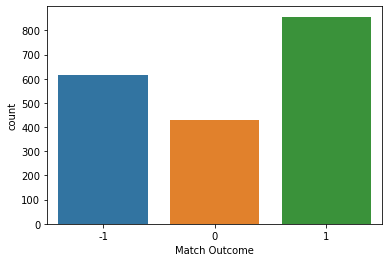

In [663]:
sns.countplot(x="Match Outcome", data=df)

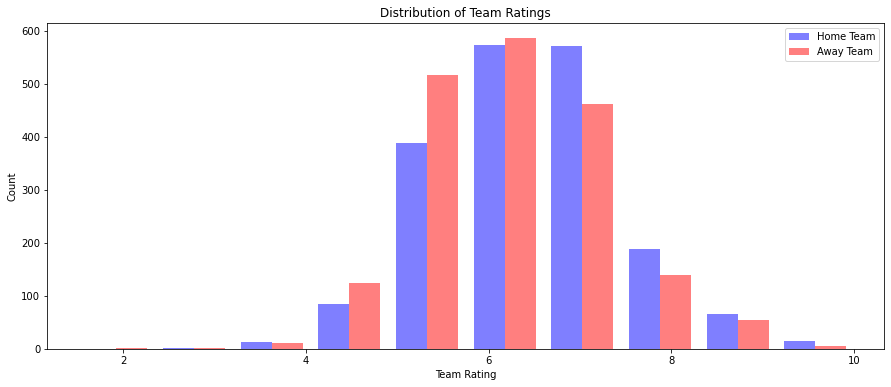

In [664]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
#GRAPHES DE LA DISTRIBUTION DE LA NOTE DES EQUIPES

axs.hist([df['HT Rating'], df['AT Rating']], color=['blue', 'red'], alpha=0.5, bins=10)
axs.set_xlabel('Team Rating')
axs.set_ylabel('Count')
axs.set_title('Distribution of Team Ratings')
axs.legend(['Home Team', 'Away Team'])

plt.show()


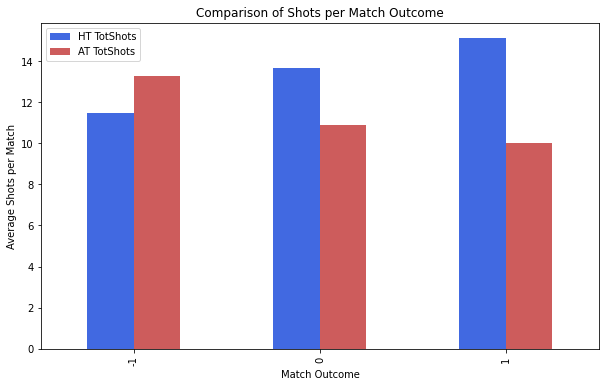

In [665]:
# Graphique en barres pour comparer les tirs de chaque équipe pour chaque issue de match
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('Match Outcome').agg({'HT TotShots': 'mean', 'AT TotShots': 'mean'}).plot(kind='bar', ax=ax, color=['royalblue', 'indianred'])
ax.set_xlabel('Match Outcome')
ax.set_ylabel('Average Shots per Match')
ax.set_title('Comparison of Shots per Match Outcome')
plt.show()


### **CREATION D'UN NOUVEAU DATAFRAME** ###
***Moyenne des features pour chaque équipe***

In [666]:
#on copie de df pour faire un autre pour chaque équipe
df_matches = df
dfteams = pd.DataFrame()
for team in df_matches["Home Team"].unique(): # on boucle sur chaque équipe unique 

    df_current_team = pd.DataFrame()  # on prend un nouveau DataFrame pour l'équipe courante de la boucle 

    df_home_matches = df_matches[df_matches["Home Team"] == team] # match à domicile de l'équipe courante
    df_away_matches = df_matches[df_matches["Away Team"] == team] # match à l'exterieur de l'équipe courante
    df_all_matches = pd.concat([df_home_matches, df_away_matches]) # on assemble pour avoir tous les matchs de l'équipe courante

    df_current_team["Team"] = [team]
    # on crée une colonne average pour chaque features (*)
    average_possession = (df_home_matches["HT Posses %"].mean() + df_away_matches["AT Posses %"].mean()) / 2
    df_current_team["Average Posses"] = average_possession

    # Features à calculer la moyenne pour chaque équipe
    featuresHA = ["Goals Scored", "Goals Conceeded", "xG", "NSxG", "TotShots", "OffT Shots", "OnT Shots", "Block Shots", "Pass %", 
            "Corners", "Throw Ins", "Aerials Won", "Clear", 
            "Fouls", "YellowC", "SecYellowC", "RedC", "Importance", "ProjScore", "AdjScore", "SPI Rate", "ProbWin","Rating"]

    # on repete le processus (*) pour chaque feature de type ("HT" ou "Away Team")
    for feature in featuresHA:
        home_feature_mean = df_home_matches["HT " + feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches["AT " + feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean + away_feature_mean) / 2 # moyenne pour tous les matchs
        df_current_team["Average " + feature] = avg_feature

    # on fait la même chose pour les issues de match et la différence de buts
    features = ["Match Outcome", "Score Difference"]
    
    for feature in features:

        home_feature_mean = df_home_matches[feature].mean()  # moyenne pour les matchs à domicile
        away_feature_mean = df_away_matches[feature].mean()  # moyenne pour les matchs à l'extérieur

        avg_feature = (home_feature_mean - away_feature_mean) / 2 # moyenne pour tous les matchs (on fait bien - pour inverser les -1 des victoires à l'extérieur)
        df_current_team["Average " + feature] = avg_feature
      
    dfteams = pd.concat([dfteams, df_current_team], ignore_index=True) # on ajoute la ligne pour l'équipe courante au DF de toutes les équipes


***CREATION DU DATAFRAME DE TOUTES LES CONFRONTATIONS***

In [667]:
matchs = df[["season","date",'MatchWeek',"Home Team","Away Team", "Match Outcome"]]
matchs.head()

,season,date,MatchWeek,Home Team,Away Team,Match Outcome
0,2016,2016-08-13,1,HULL CITY,LEICESTER CITY,1
1,2016,2016-08-13,1,EVERTON,TOTTENHAM,0
2,2016,2016-08-13,1,MIDDLESBROUGH,STOKE,0
3,2016,2016-08-13,1,BURNLEY,SWANSEA,-1
4,2016,2016-08-13,1,SOUTHAMPTON,WATFORD,0


***
### **DATA VISUALIZATION "dfteams" :** ### 
***


In [668]:
#remmettre les index a 0
dfteams = dfteams.sort_values("Team").reset_index(drop=True)
dfteams

,Team,Average Posses,Average Goals Scored,Average Goals Conceeded,Average xG,Average NSxG,Average TotShots,Average OffT Shots,Average OnT Shots,Average Block Shots,Average Pass %,Average Corners,Average Throw Ins,Average Aerials Won,Average Clear,Average Fouls,Average YellowC,Average SecYellowC,Average RedC,Average Importance,Average ProjScore,Average AdjScore,Average SPI Rate,Average ProbWin,Average Rating,Average Match Outcome,Average Score Difference
0,ARSENAL,57.347368,1.763158,1.226316,1.645000,1.897842,13.121053,4.784211,4.778947,3.568421,83.200000,5.784211,19.878947,14.963158,19.589474,10.305263,1.757895,0.015789,0.073684,44.047526,1.808053,1.756789,80.288789,0.503368,6.552632,0.210526,0.536842
1,ASTON VILLA,45.973684,1.263158,1.486842,1.388816,1.278684,12.894737,4.934211,4.447368,3.539474,76.697368,5.434211,20.631579,18.592105,20.500000,11.710526,1.789474,0.065789,0.000000,37.890263,1.240789,1.276316,68.969868,0.313289,6.078947,-0.144737,-0.223684
2,BOURNEMOUTH,47.532895,1.289474,1.730263,1.313158,1.301974,11.519737,4.394737,3.960526,3.177632,76.782895,5.236842,21.736842,18.197368,26.776316,9.315789,1.618421,0.032895,0.019737,22.522961,1.244013,1.295132,62.325000,0.297237,6.093421,-0.184211,-0.440789
3,BRIGHTON,47.276316,0.973684,1.407895,1.191382,1.207303,11.197368,4.730263,3.361842,3.105263,77.000000,4.710526,21.671053,18.782895,21.453947,11.105263,1.447368,0.026316,0.065789,25.067763,1.063355,0.998618,63.984276,0.281316,6.048684,-0.197368,-0.434211
4,BURNLEY,41.489474,1.031579,1.405263,1.120158,1.163737,10.010526,4.215789,3.310526,2.500000,69.189474,4.205263,21.636842,24.889474,26.752632,10.173684,1.689474,0.005263,0.010526,21.561789,1.075947,1.046684,63.304368,0.283000,5.826842,-0.126316,-0.373684
5,CARDIFF,34.842105,0.894737,1.815789,1.086316,1.078421,10.973684,4.710526,3.315789,3.000000,63.236842,4.421053,21.026316,25.815789,25.736842,9.842105,1.736842,0.000000,0.026316,47.973684,1.021053,0.922368,58.423684,0.247895,5.605263,-0.368421,-0.921053
6,CHELSEA,59.215789,1.773684,1.052632,1.783211,1.916211,15.663158,5.584211,5.542105,4.536842,85.047368,5.978947,20.500000,15.473684,17.736842,10.084211,1.447368,0.015789,0.021053,64.628211,1.929211,1.772842,84.988000,0.585316,6.876316,0.352632,0.721053
7,CRYSTAL PALACE,43.994737,1.147368,1.510526,1.182368,1.265105,11.226316,4.515789,3.621053,3.110526,74.410526,4.978947,22.115789,19.526316,23.600000,11.126316,1.715789,0.010526,0.021053,21.140474,1.135526,1.144263,64.624316,0.291684,6.140000,-0.152632,-0.363158
8,EVERTON,49.000000,1.321053,1.326316,1.358526,1.290579,11.731579,4.473684,4.168421,3.110526,77.121053,4.900000,21.578947,20.131579,24.552632,11.631579,1.652632,0.036842,0.036842,15.340474,1.314316,1.322684,70.406684,0.357579,6.303684,0.036842,-0.005263
9,FULHAM,49.289474,0.802632,1.763158,1.096974,1.193947,11.789474,5.000000,3.697368,3.092105,79.684211,4.276316,20.381579,18.197368,22.421053,11.921053,1.802632,0.026316,0.039474,37.500000,1.075921,0.835395,62.520263,0.265395,5.834211,-0.447368,-0.960526


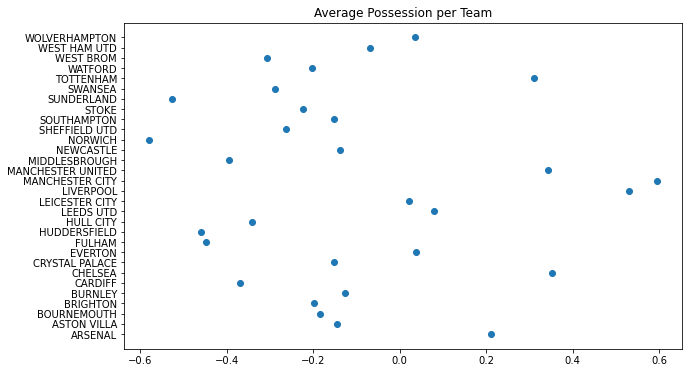

In [669]:
plt.subplots(figsize=(10, 6))
plt.scatter(x="Average Match Outcome", y="Team", data=dfteams)
plt.title("Average Possession per Team")
plt.show()


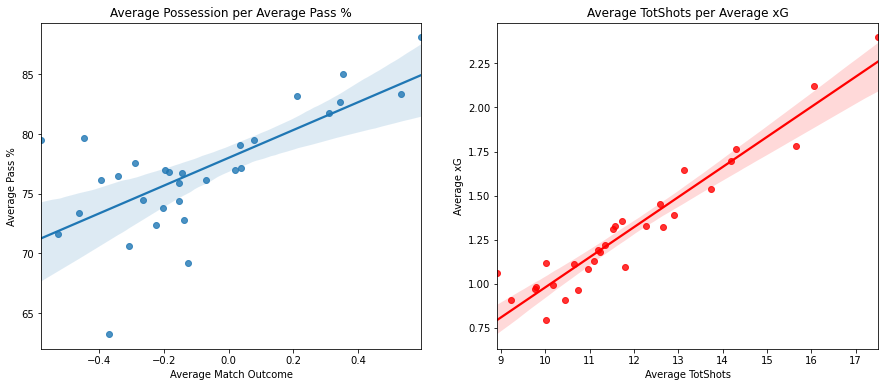

In [670]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.regplot(x='Average Match Outcome', y='Average Pass %', data=dfteams, ax=axs[0])
axs[0].set_title("Average Possession per Average Pass %")

sns.regplot(x='Average TotShots', y='Average xG', data=dfteams, ax=axs[1], color='red')
axs[1].set_title("Average TotShots per Average xG")

plt.show()

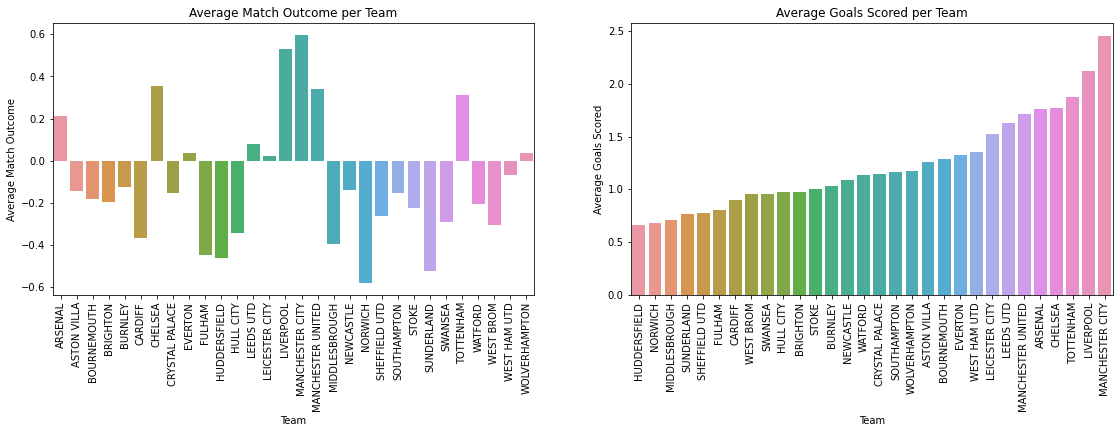

In [671]:
fig, axs = plt.subplots(1, 2, figsize=(19, 5))

sns.barplot(x="Team", y="Average Match Outcome", data=dfteams, ax=axs[0])
axs[0].set_xticklabels(dfteams['Team'], rotation=90)
axs[0].set_title("Average Match Outcome per Team")

dfteams1 = dfteams.sort_values("Average Goals Scored")
sns.barplot(x="Team", y="Average Goals Scored", data=dfteams1, ax=axs[1])
axs[1].set_xticklabels(dfteams1['Team'], rotation=90)
axs[1].set_title("Average Goals Scored per Team")

plt.show()

***CORRELATION ENTRE LE FEATURES***

In [672]:
scaler = Normalizer()
df_normalized = dfteams.drop(["Team","Average YellowC","Average SecYellowC","Average RedC"], axis=1)
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)
df_normalized = df_normalized.corr()


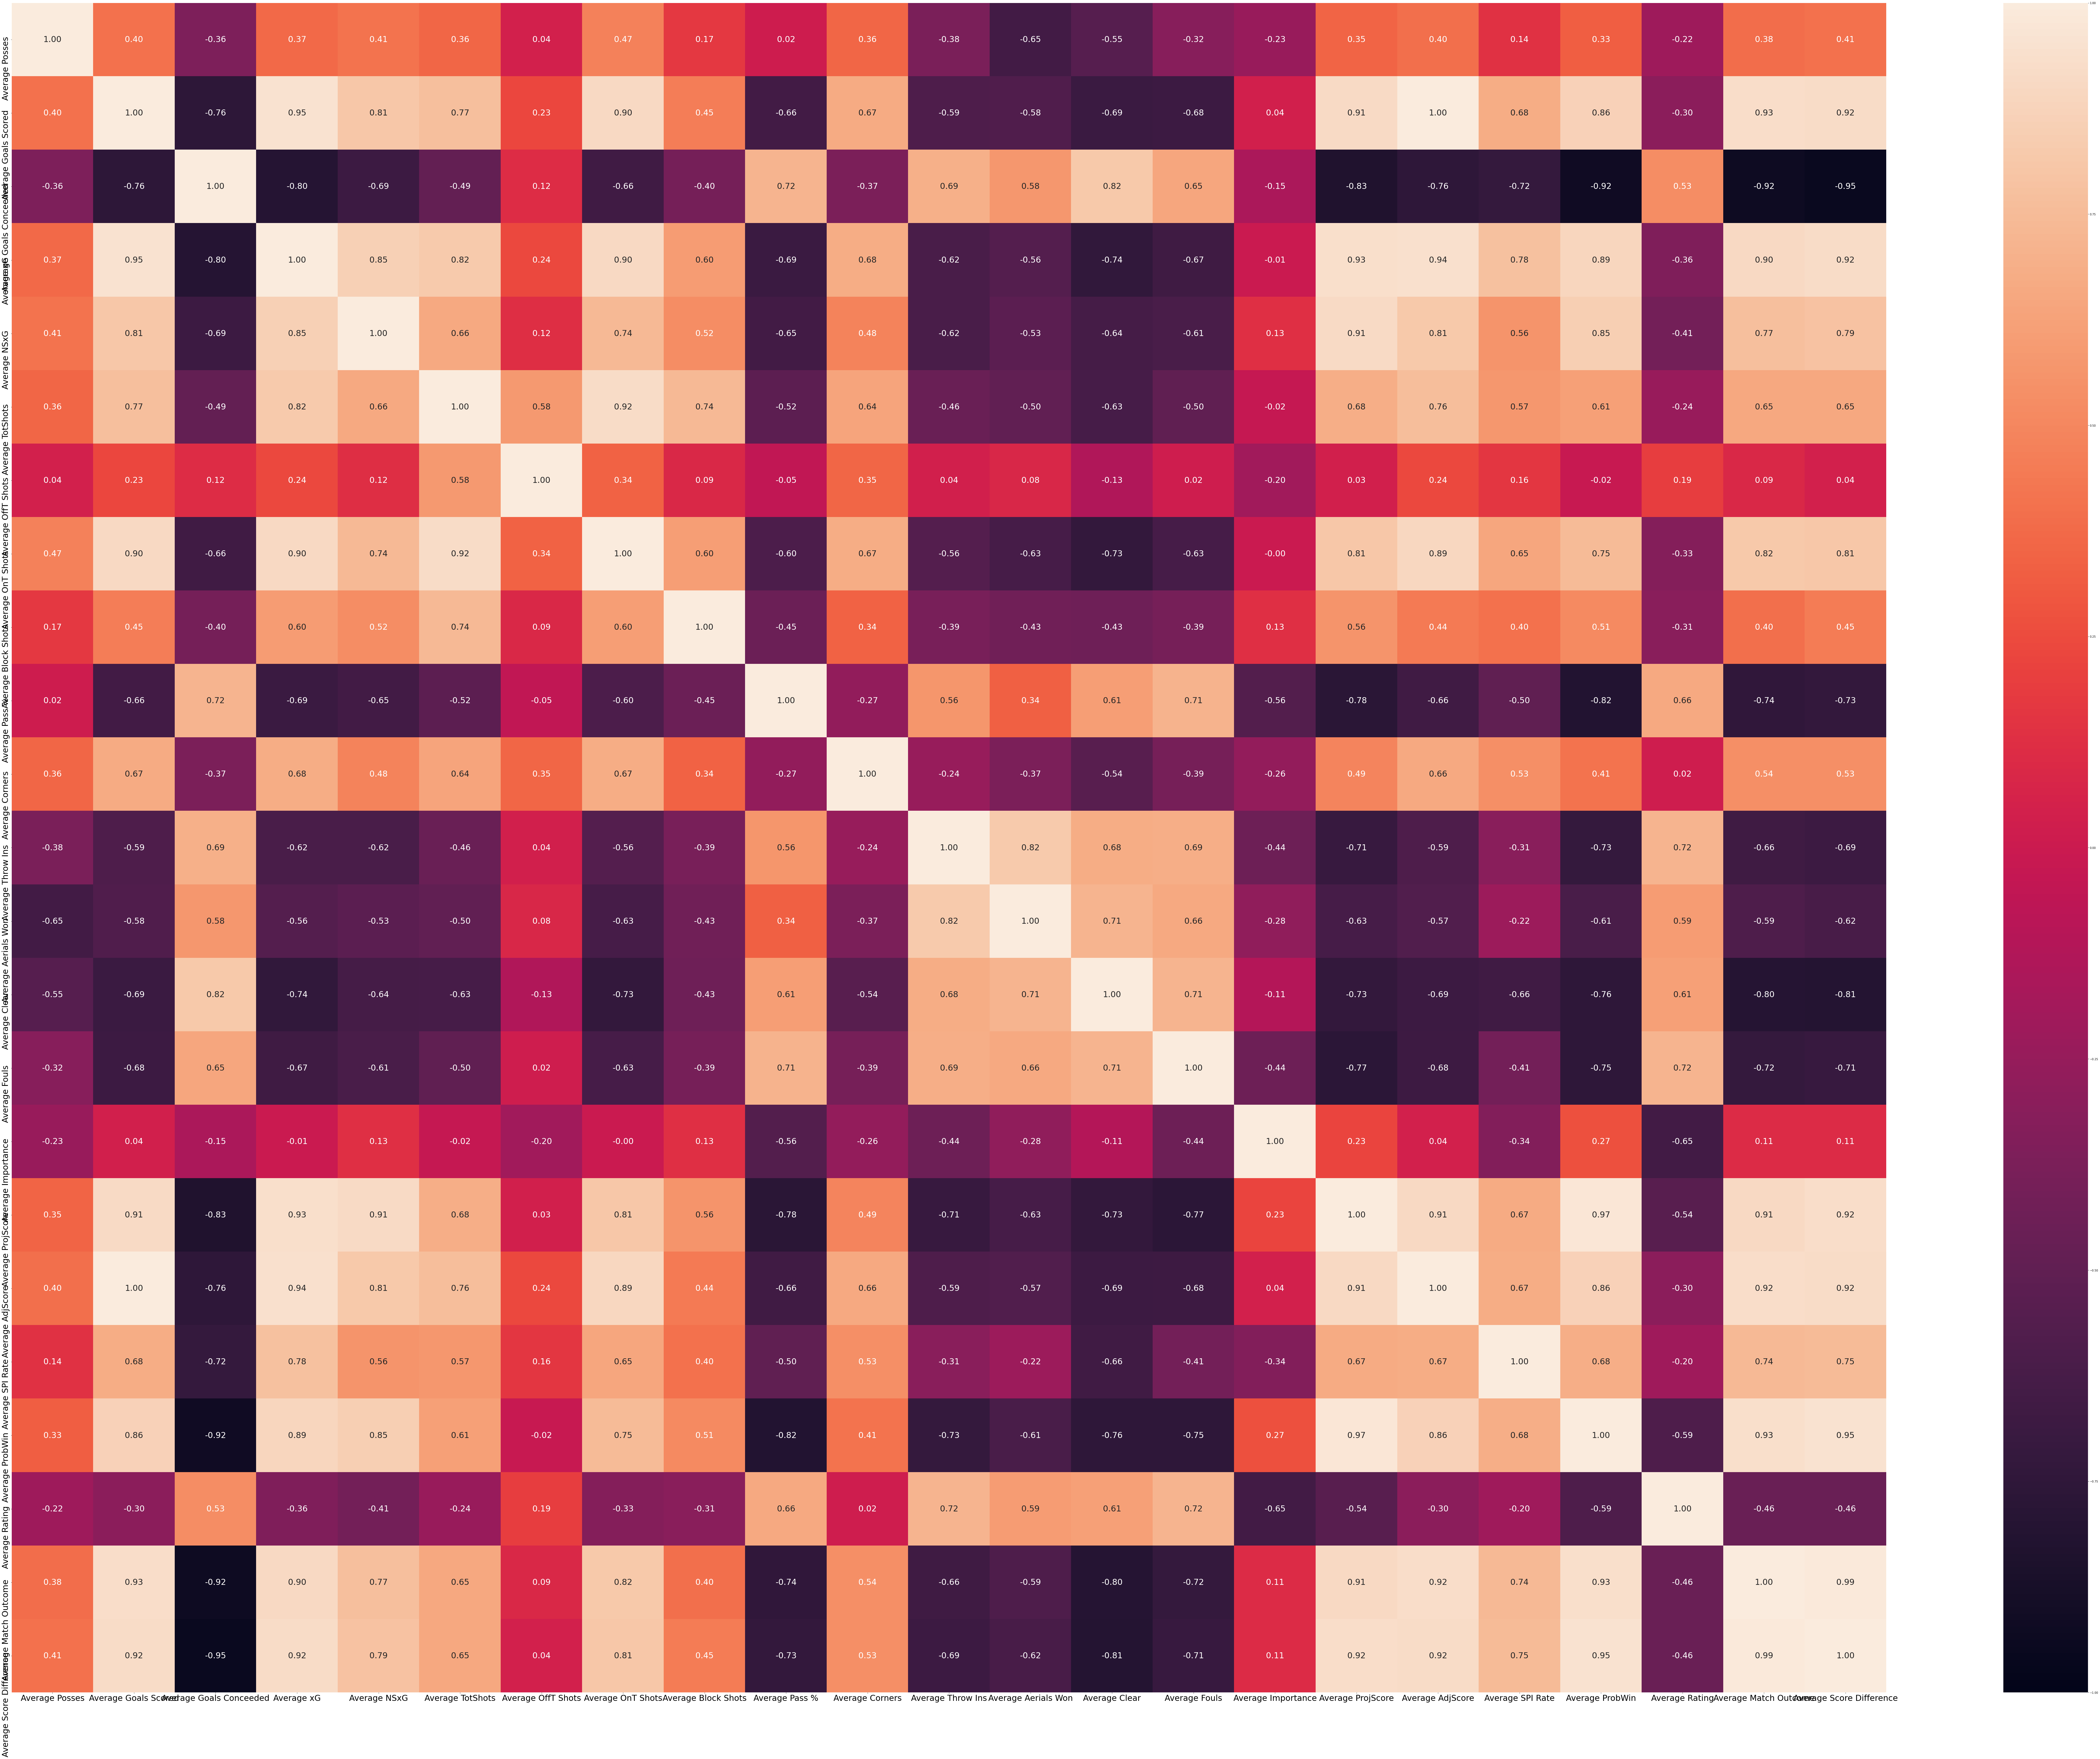

In [673]:
plt.figure(figsize=(120, 90))
heatmap= sns.heatmap(data=df_normalized, annot=True, fmt='.2f', vmin=-1, vmax=1,annot_kws={"fontsize":30})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30)
plt.tight_layout()

plt.show()

#### VISUALIZATION TEAMS STATS 

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


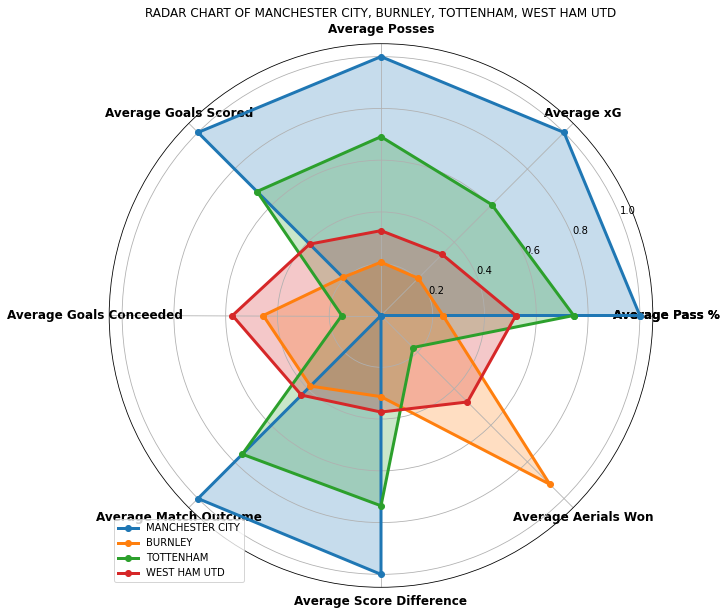

In [674]:
# FONCTION POUR PLOTTER UN RADAR POUR UNE LISTE D'EQUIPES
def plot_series_radar(df, names):
    labels = np.array(["Average Pass %", "Average xG", "Average Posses","Average Goals Scored","Average Goals Conceeded", "Average Match Outcome", "Average Score Difference", "Average Aerials Won"])
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles = np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    indexes = []
    stats = []
    for name in names:
        indexes.append(df[df['Team'] == name].index[0])
        stats.append(list(df.loc[indexes[-1], labels].values))


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    for stat, name in zip(stats, names):
        ax.plot(angles, stat, 'o-', linewidth=3, label=name)
        ax.fill(angles, stat, alpha=0.25)

    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=12, fontweight='bold')
    ax.grid(True)
    plt.legend(loc='lower left')
    ax.set_title('RADAR CHART OF %s' % (', '.join(names)))
    plt.show()

df_norm = dfteams[["Team","Average Pass %", "Average xG", "Average Posses","Average Goals Scored","Average Goals Conceeded", "Average Match Outcome", "Average Score Difference","Average Aerials Won"]]

# on normalise les données
scaler = MinMaxScaler()
cols_to_normalize = [col for col in df_norm.columns if col != "Team"]
df_norm.loc[:, cols_to_normalize] = scaler.fit_transform(df_norm.loc[:, cols_to_normalize])

names = ["MANCHESTER CITY",'BURNLEY', 'TOTTENHAM', 'WEST HAM UTD']
plot_series_radar(df_norm,names)

***
## **ENCODAGE :** ##  
*avec fonctions d'encodage et de décodage pour les noms d'équipes pour tous les dataframe*  
***  


***FONCTIONS POUR LE DATAFRAME DE BASE***

In [675]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# encodeur sur les noms des équipes
encoder.fit(df[["Home Team", "Away Team"]])


# FONCTIONS POUR VISUALISER LES NOMS D'EQUIPES
def decode_df():
    df[["Home Team", "Away Team"]] = encoder.inverse_transform(df[["Home Team", "Away Team"]]) # transformation des nombres en noms des équipes 

def encode_df():
    df[["Home Team", "Away Team"]] = encoder.transform(df[["Home Team", "Away Team"]])# transformation des noms des équipes en nombres

***CREATION DATAFRAME POUR IDENTIFIER L'ENCODAGE DE CHAQUE EQUIPE***

In [676]:
teams_ID = pd.DataFrame()
encode_df()
teams_ID["Team ID"] = df["Home Team"].unique()
decode_df()
teams_ID["Team Name"] = df["Home Team"].unique()

In [677]:
teams_ID.sort_values("Team Name")

,Team ID,Team Name
8,0.0,ARSENAL
27,1.0,ASTON VILLA
7,2.0,BOURNEMOUTH
20,3.0,BRIGHTON
3,4.0,BURNLEY
25,5.0,CARDIFF
9,6.0,CHELSEA
5,7.0,CRYSTAL PALACE
1,8.0,EVERTON
23,9.0,FULHAM


***FONCTIONS POUR LE DATAFRAME DES EQUIPES***

In [678]:
encoder_t = OrdinalEncoder()
encoder_t.fit(dfteams[["Team"]])
def decode_dfteams():
    dfteams[["Team"]] = encoder_t.inverse_transform(dfteams[["Team"]]) # transformation des nombres en noms des équipes e

def encode_dfteams():
    dfteams[["Team"]] = encoder_t.transform(dfteams[["Team"]]) # transformation des nombres en noms des équipes

***FONCTIONS POUR LE DATAFRAME DES CONFRONTATIONS***

In [679]:
encoder.fit(matchs[["Home Team", "Away Team"]])
def decode_matchs():
   matchs[["Home Team", "Away Team"]] = encoder.inverse_transform(matchs[["Home Team", "Away Team"]])

def encode_matchs():
    matchs[["Home Team", "Away Team"]] = encoder.transform(matchs[["Home Team", "Away Team"]])

***FONCTIONS POUR DECODER LES NOMS PLUS FACILEMENT***

In [680]:
def get_team(value):
    """Renvoie le nom de l'équipe correspondant à un numéro, ou inversement"""
    if isinstance(value, str):
        return teams_ID.loc[teams_ID['Team Name'] == value, 'Team ID'].iloc[0]
    else:
        return teams_ID.loc[teams_ID['Team ID'] == value, 'Team Name'].iloc[0]


In [681]:
print(get_team("MANCHESTER UNITED"))
print(get_team(16))

16.0
MANCHESTER UNITED


---
---

## **MODEL** ##

***ON COMMENCE DONC PAR ENCODER NOS VALEURS CATEGORIELLES***

In [682]:
encode_df()
encode_dfteams()
encode_matchs()

<ipython-input-679-5194a3e62d55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchs[["Home Team", "Away Team"]] = encoder.transform(matchs[["Home Team", "Away Team"]])
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [683]:
## ON SUPPRIME LES COLONNES DISCRIMINANTES
# df =df.drop("HT Goals Scored", axis = 1)
# df = df.drop("AT Goals Scored", axis = 1)
df = df.drop("HT Goals Conceeded", axis = 1)
df = df.drop("AT Goals Conceeded", axis = 1)

***Dans le cadre de la prédiction des résultats de matchs de football, nous avons choisi Random Forest pour plusieurs raisons :***

- Il peut gérer efficacement des ensembles de données volumineux et complexes, ce qui est souvent le cas avec les données de football qui incluent de nombreuses variables et des interactions complexes entre elles.

- Il peut être utilisé pour extraire l'importance des variables, ce qui permet d'identifier les caractéristiques les plus pertinentes pour prédire les résultats des matchs.
- Il peut être utilisé pour prédire des probabilités de victoire, de match nul ou de défaite, plutôt qu'une simple prédiction binaire.

---
#### **PREMIER TYPE DE PREDICTION:**

***On fournit toutes les données d'un match et on essaye de déterminer l'issue***

---

***ON COMMENCE PAR DONNER UNIQUEMENT LES STATS DU MATCH***

In [684]:
features = ['season', 'Home Team', 'Match Excitement','Away Team',
            # "HT Goals Scored", "AT Goals Scored",
       'HT Rating', 'AT Rating',
       'HT Posses %','AT Posses %', 
       'HT OffT Shots','HT OnT Shots', 'HT TotShots',
       'HT Block Shots', 'HT Corners', 'HT Throw Ins',
       'HT Pass %', 'HT Aerials Won',
       'HT Clear', 'HT Fouls', 'HT YellowC',
       'HT SecYellowC', 'HT RedC',
       'AT OffT Shots', 'AT OnT Shots',
       'AT TotShots', 'AT Block Shots', 'AT Corners',
       'AT Throw Ins', 'AT Pass %',
       'AT Aerials Won', 'AT Clear', 'AT Fouls',
       'AT YellowC', 'AT SecYellowC',
       'AT RedC', 'HT xG', 'AT xG',
       'HT NSxG', 'AT NSxG', 'HT SPI Rate','AT SPI Rate'
       ]

In [685]:
# ON DIVISE LES DONNEES EN ENSEMBLE D'ENTRAINEMENT ET DE TEST SIMPLEMENT 
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.3, random_state=42)

# ON UTILISE UN RANDOM FOREST CLASSIFIER 
model = RandomForestClassifier(random_state=2)

# ENTRAINEMENT DU MODELE
model.fit(X_train, y_train)

# PREDICTION SUR L'ENSEMBLE DE TEST
y_pred = model.predict(X_test)

# ON EVALUER LE MODELE
accuracy = accuracy_score(y_test, y_pred)
print("Model Precision : {:.3f}%".format(accuracy * 100))

Model Precision : 88.947%


In [686]:
importances = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

# on affiche les 10 caractéristiques les plus importantes
print(importances*100)

AT Rating           25.060227
HT Rating           21.819979
AT xG                4.091530
Match Excitement     4.065641
HT xG                3.431694
AT SPI Rate          2.633686
HT Clear             2.376954
HT SPI Rate          2.375239
HT OnT Shots         2.125481
AT OnT Shots         1.979987
dtype: float64


***ON REMARQUE QUE LA NOTE ATTRIBUEE AUX EQUIPES APRES LE MATCH INFLUE FORTEMENT SUR LE RESULTAT. ESSAYONS SANS !***

In [687]:
features = ['season', 'Home Team', 'Match Excitement','Away Team',
            # "HT Goals Scored", "AT Goals Scored",
      #  'HT Rating', 'AT Rating',
       'HT Posses %','AT Posses %', 
       'HT OffT Shots','HT OnT Shots', 'HT TotShots',
       'HT Block Shots', 'HT Corners', 'HT Throw Ins',
       'HT Pass %', 'HT Aerials Won',
       'HT Clear', 'HT Fouls', 'HT YellowC',
       'HT SecYellowC', 'HT RedC',
       'AT OffT Shots', 'AT OnT Shots',
       'AT TotShots', 'AT Block Shots', 'AT Corners',
       'AT Throw Ins', 'AT Pass %',
       'AT Aerials Won', 'AT Clear', 'AT Fouls',
       'AT YellowC', 'AT SecYellowC',
       'AT RedC', 'HT xG', 'AT xG',
       'HT NSxG', 'AT NSxG', 
       'HT SPI Rate','AT SPI Rate',
      #   'HT Prev Rank', 'AT Prev Rank',
     #   "HT Prev Points", "AT Prev Points",
     #   'HT Goals Scored L3M',
     #   'AT Goals Scored L3M', 'HT Goals Conceeded L3M',
     #   'AT Goals Conceeded L3M', 'HT xG L3M', 'AT xG L3M', 'HT NSxG L3M',
     #   'AT NSxG L3M', 'HT TotShots L3M', 'AT TotShots L3M', 'HT RedC L3M',
     #   'AT RedC L3M', 'HT Importance L3M', 'AT Importance L3M',
     #   'HT Match Outcome L3M', 'AT Match Outcome L3M',
     #   'HT Score Difference L3M', 'AT Score Difference L3M'
       ]

In [688]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# scores = cross_val_score(clf, df[features], df["Score Difference"], cv=5)
# print("Cross-validation scores:", scores*100)
# print("Average score:", scores.mean()*100)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

importances = pd.Series(clf.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

print(importances*100)

Précision : 73.16%
HT xG               7.951372
AT xG               7.775473
Match Excitement    6.460805
HT OnT Shots        5.187287
AT SPI Rate         4.685302
HT Clear            4.599418
AT OnT Shots        4.365245
AT Clear            4.209591
HT SPI Rate         3.965686
HT NSxG             2.736595
dtype: float64


In [689]:
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        correct_predictions.append(X_test.index[i])
    else:
        incorrect_predictions.append(X_test.index[i])

print("Nombre de prédictions correctes :", len(correct_predictions))
print("Nombre de prédictions incorrectes :", len(incorrect_predictions))


Nombre de prédictions correctes : 417
Nombre de prédictions incorrectes : 153


***EXEMPLE DE MAUVAISE PREDICTION***

In [690]:
id = 35
print("Match of Season", X_test["season"].values[X_test.index.get_loc(incorrect_predictions[id])], ":", get_team(X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[id])]),"-", get_team(X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[id])]) ,"Prédiction :", y_pred[X_test.index.get_loc(incorrect_predictions[id])], " Résultat réel :", y_test[incorrect_predictions[id]])
print("Match :", get_team(X_test["Home Team"].values[X_test.index.get_loc(incorrect_predictions[id])]),"-", get_team(X_test["Away Team"].values[X_test.index.get_loc(incorrect_predictions[id])]) ,"Probas :", y_pred2[X_test.index.get_loc(incorrect_predictions[id])])

# for i in incorrect_predictions:
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"prédiction :", y_pred[X_test.index.get_loc(i)], "résultat réel :", y_test[i])
#     print("Match :", X_test["HT"].values[X_test.index.get_loc(i)],"-", X_test["Away Team"].values[X_test.index.get_loc(i)] ,"proba :", y_pred2[X_test.index.get_loc(i)])

Match of Season 2019 : ARSENAL - TOTTENHAM Prédiction : 1  Résultat réel : 0
Match : ARSENAL - TOTTENHAM Probas : [0.32 0.25 0.43]


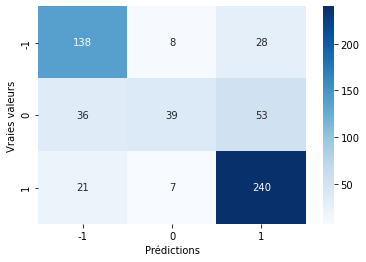

In [691]:
cm = confusion_matrix(y_test, y_pred)
y_labels = ['-1', '0', '1']

# Heatmap de la matrice de confusion 
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=y_labels, yticklabels=y_labels, fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()


---
**La matrice de confusion indique le nombre de vrais positifs, faux positifs, vrais négatifs et faux négatifs pour chaque issue de match**.   


On a:       


- *Pour les victoires des équipes à l'extérieur, il y a 54 bonnes prédictions, 8 erreur avec un match nul et 28 avec une victoire de l'équipe à domicile.*


- *Pour les matchs nuls, il y a 39 bonnes prédictions, 36 erreur avec victoire de l'équipe à domicile et 36 avec une victoire de l'équipe à l'extérieur.*


- *Pour les victoires des équipes à domicicle, il y a 240 bonnes prédictions, 7 erreurs avec un match nul et 21 avec une victoire de l'équipe à l'extérieur.*


Cela signifie que notre modèle a tendance à prédire les victoires à domicle plus souvent que les autres issues, ce qui se reflète dans le nombre élevé de vrais positifs pour cette classe. En revanche, notre modèle a du mal à distinguer les matchs nuls. Ceci peut s'expliquer des matchs plus indécis et donc qui peuvent basculer sur les 3 issues.

Ces résultats suggèrent qu'il y a des ajustements à faire pour améliorer la capacité de notre modèle à distinguer ces deux issues.

---

***ON OPTIMISE DONC LES HYPERPARAMETRES***

In [692]:
# APRES AVOIR TESTER POUR DE NOMBREUX HYPER PARAM ON OBTIENT CELA
param_grid = {
    "n_estimators": [200],
    "max_depth": [20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["log2"],
    "criterion": ['entropy'],
    "bootstrap": [True],
    "max_samples": [None]

}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

###################################################
################### 2 MINUTES 30 ##################
###################################################


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Meilleurs paramètres trouvés :
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Précision : 72.28%


In [693]:
# ON TESTE LES DIFFERENTES TAILLES DE TEST
test_sizes = np.arange(0.15, 0.4, 0.01)

accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=test_size, random_state=42)
    
    clf = RandomForestClassifier(random_state=2, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features="log2", bootstrap=True, max_samples=None, criterion="entropy")
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracies.append(accuracy)

best_test_size = test_sizes[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print("Meilleure valeur de test_size : {:.2f}".format(best_test_size))
print("Précision correspondante : {:.2f}%".format(best_accuracy * 100))


Meilleure valeur de test_size : 0.21
Précision correspondante : 73.00%


In [694]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.21, random_state=42)

clf = RandomForestClassifier(random_state=2, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features="log2", bootstrap=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# scores = cross_val_score(clf, df[features], df["Score Difference"], cv=5)
# print("Cross-validation scores:", scores*100)
# print("Average score:", scores.mean()*100)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

importances = pd.Series(clf.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

print(importances*100)

Précision : 74.44%
HT xG               8.632282
AT xG               7.912226
Match Excitement    6.642826
HT OnT Shots        5.208526
AT OnT Shots        5.155122
AT SPI Rate         4.639512
HT Clear            4.415157
HT SPI Rate         4.148751
AT Clear            4.045030
HT NSxG             2.774991
dtype: float64


***ON ESSAYE MAINTENANT DE REGARDER UNIQUEMENT NOS DONNEES D'AVANT MATCH QUE L'ON A CREEE EN PREPREOCESSING***

In [695]:
features = ['season', 'Home Team','Away Team', "MatchWeek",
            # "HT Goals Scored", "AT Goals Scored",
       # 'HT Rating', 'AT Rating',
    #    'HT Posses %','AT Posses %', 
    #    'HT OffT Shots','HT OnT Shots', 'HT TotShots',
    #    'HT Block Shots', 'HT Corners', 'HT Throw Ins',
    #    'HT Pass %', 'HT Aerials Won',
    #    'HT Clear', 'HT Fouls', 'HT YellowC',
    #    'HT SecYellowC', 'HT RedC',
    #    'AT OffT Shots', 'AT OnT Shots',
    #    'AT TotShots', 'AT Block Shots', 'AT Corners',
    #    'AT Throw Ins', 'AT Pass %',
    #    'AT Aerials Won', 'AT Clear', 'AT Fouls',
    #    'AT YellowC', 'AT SecYellowC',
    #    'AT RedC', 'HT xG', 'AT xG',
    #    'HT NSxG', 'AT NSxG', 
       'HT SPI Rate','AT SPI Rate',
       'HT Prev Rank', 'AT Prev Rank',
       "HT Prev Points", "AT Prev Points",
       'HT Goals Scored L3M',
       'AT Goals Scored L3M', 'HT Goals Conceeded L3M',
       'AT Goals Conceeded L3M', 'HT xG L3M', 'AT xG L3M', 'HT NSxG L3M',
       'AT NSxG L3M', 'HT TotShots L3M', 'AT TotShots L3M', 'HT RedC L3M',
       'AT RedC L3M', 'HT Importance L3M', 'AT Importance L3M',
       'HT Match Outcome L3M', 'AT Match Outcome L3M',
       'HT Score Difference L3M', 'AT Score Difference L3M'
       ]

In [696]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df["Match Outcome"], test_size=0.21, random_state=42)

clf = RandomForestClassifier(random_state=2, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features="log2", bootstrap=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

# scores = cross_val_score(clf, df[features], df["Score Difference"], cv=5)
# print("Cross-validation scores:", scores*100)
# print("Average score:", scores.mean()*100)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

importances = pd.Series(clf.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

print(importances*100)

Précision : 55.14%
AT SPI Rate          6.742874
HT SPI Rate          6.734046
AT NSxG L3M          5.278601
AT xG L3M            5.200113
HT NSxG L3M          4.959756
AT Importance L3M    4.589218
AT TotShots L3M      4.582711
HT Importance L3M    4.422172
HT xG L3M            4.391993
HT Prev Rank         4.254315
dtype: float64


### PCA

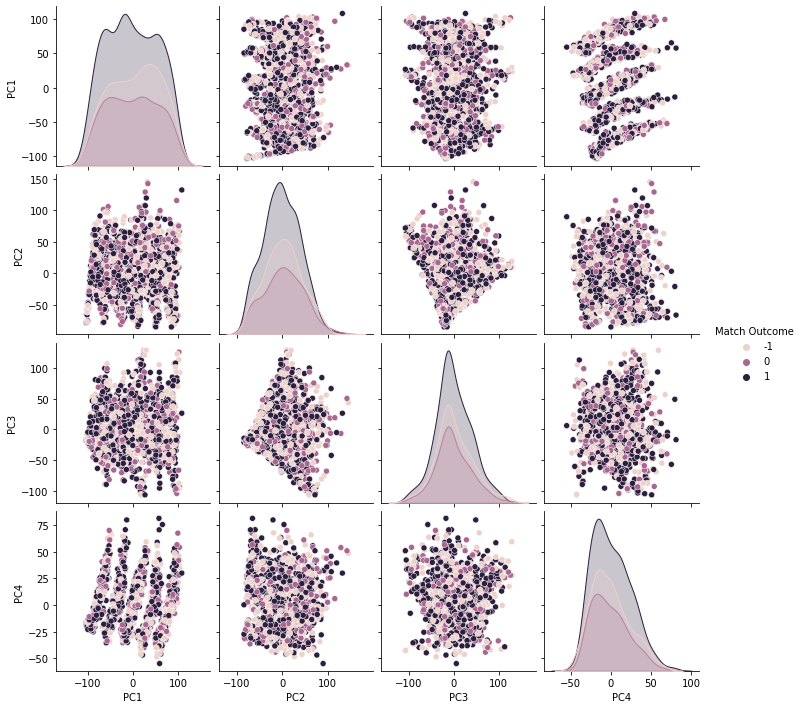

In [697]:
from sklearn.decomposition import PCA

# on instancie un objet PCA avec 4 composantes principales
pca = PCA(n_components=4)

# calcul des composantes principales
principal_components = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3", "PC4"])

# on ajoute la variable cible au DataFrame des composantes principales
pca_df["Match Outcome"] = df["Match Outcome"]

# on affiche des nuages de points pour chaque combinaison de deux composantes principales
sns.pairplot(pca_df, hue="Match Outcome", vars=["PC1", "PC2", "PC3", "PC4"])

In [698]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df[["PC1","PC2","PC3","PC4"]], pca_df["Match Outcome"], test_size=0.21,random_state=42 )

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_pca, y_train_pca)

# on utilise le modèle pour prédire sur les données transformées PCA
y_pred = clf.predict(X_test_pca)

print(f"Accuracy: {accuracy_score(y_test_pca, y_pred):.2f}")


Accuracy: 0.38


***La méthode d'analyse en composantes principales (PCA) pour réduire la dimensionnalité n'améliore pas les performances du modèle.***

----

### **CROSS-VALIDATION**

***ON EFFECTUE ICI UNE CROSS-VALIDATION AVEC DES GROUPES DANS L'ORDRE CHRONOLOGIQUE***

In [699]:
# CETTE FOIS CI, ON VA UTILISER NOS STATS DE MATCH ET D'AVANT MATCH

features = ['MatchWeek', 'Home Team', 'Away Team', 
        # 'Match Excitement',
        # 'HT Goals Scored','AT Goals Scored',
        
       # 'HT Rating', 'AT Rating', 
       'HT Posses %', 'AT Posses %', 'HT OffT Shots',
       'HT OnT Shots', 'HT TotShots', 'HT Block Shots', 'HT Corners', 'HT Throw Ins', 'HT Pass %', 'HT Aerials Won', 'HT Clear', 'HT Fouls',
       'HT YellowC', 'HT SecYellowC', 'HT RedC', 'AT OffT Shots',
       'AT OnT Shots', 'AT TotShots', 'AT Block Shots', 'AT Corners',
       'AT Throw Ins', 'AT Pass %', 'AT Aerials Won', 'AT Clear', 'AT Fouls',
       'AT YellowC', 'AT SecYellowC', 'AT RedC', 
       'HT SPI Rate', 'AT SPI Rate', 
       'HT ProbWin', 'AT ProbWin', 'probtie',
       'HT ProjScore', 'AT ProjScore', 
       'HT Importance', 'AT Importance',
       'HT xG', 'AT xG', 'HT NSxG', 'AT NSxG',
       "HT Prev Points", "AT Prev Points",
       'HT Goals Scored L3M',
       'AT Goals Scored L3M', 'HT Goals Conceeded L3M',
       'AT Goals Conceeded L3M', 'HT xG L3M', 'AT xG L3M', 'HT NSxG L3M',
       'AT NSxG L3M', 'HT TotShots L3M', 'AT TotShots L3M', 'HT RedC L3M',
       'AT RedC L3M', 'HT Importance L3M', 'AT Importance L3M',
       'HT Match Outcome L3M', 'AT Match Outcome L3M',
       'HT Score Difference L3M', 'AT Score Difference L3M'
    ]

tscv = TimeSeriesSplit(n_splits=10)
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Affichage des groupes d'entraînement et de test
    # print(f"\n\nGroup {i+1}:")
    # print("Training data:")
    # print(train_data["date"])
    # print("Testing data:")
    # print(test_data["date"])

    X_train = train_data[features]
    y_train = train_data["Match Outcome"]
    X_test = test_data[features]
    y_test = test_data["Match Outcome"]

    model = RandomForestClassifier(random_state=2, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features="log2", bootstrap=True)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

scores = cross_val_score(clf, df[features], df["Match Outcome"], cv=tscv)


mean_score = scores.mean()

# score moyen
print("Average Score : {:.2f}%".format(mean_score * 100))


Accuracy: 0.622093023255814
Accuracy: 0.6511627906976745
Accuracy: 0.622093023255814
Accuracy: 0.6395348837209303
Accuracy: 0.6744186046511628
Accuracy: 0.6162790697674418
Accuracy: 0.6046511627906976
Accuracy: 0.6511627906976745
Accuracy: 0.5813953488372093
Accuracy: 0.6627906976744186
Average Score : 65.00%


In [700]:
# Extraire l'importance de chaque caractéristique
importances = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

# Afficher les importances
print(importances*100)

AT xG           5.267913
HT xG           5.184016
AT OnT Shots    3.719237
HT OnT Shots    3.712514
HT ProbWin      3.579180
HT Clear        3.346559
AT Clear        3.183597
HT ProjScore    3.099726
AT ProbWin      2.884697
AT ProjScore    2.513464
dtype: float64


In [701]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)


In [702]:
## Affiher le nombre 1 ,0 et -1 dans  y_test
print(y_test.value_counts())

## Affiher comme pour y_test le nombre 1 ,0 et -1 dans  y_pred qui est un ndarray
pd.Series(y_pred).value_counts()



-1    71
 1    66
 0    35
Name: Match Outcome, dtype: int64


 1    90
-1    74
 0     8
dtype: int64

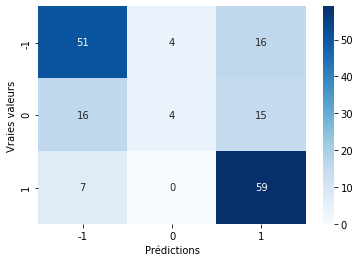

In [703]:
x_labels = ['-1', '0', '1']
y_labels = ['-1', '0', '1']

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

In [707]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Définir la stratégie de validation croisée
cv = TimeSeriesSplit(n_splits=10)

# Créer un objet RandomOverSampler pour rééquilibrer les classes
ros = RandomOverSampler(random_state=2)

# Appliquer le rééquilibrage sur l'ensemble d'entraînement
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Entraîner un nouveau modèle RandomForest sur les données rééquilibrées
clf = RandomForestClassifier(random_state=2, n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features="log2", bootstrap=True)

# Effectuer une cross-validation avec la stratégie de validation croisée chronologique et le modèle entraîné sur les données rééquilibrées
scores = cross_val_score(clf, X_resampled, y_resampled, cv=cv)

# Afficher les scores de chaque fold de la validation croisée
print("Scores de la validation croisée chronologique : {}".format(scores))

# Afficher la précision moyenne de la validation croisée
print("Précision moyenne de la validation croisée chronologique : {:.2f}%".format(scores.mean() * 100))

Scores de la validation croisée chronologique : [0.6372093  0.58604651 0.65116279 0.70232558 0.61860465 0.61860465
 0.6        0.91627907 0.73023256 0.90697674]
Précision moyenne de la validation croisée chronologique : 69.67%


<AxesSubplot:xlabel='Match Outcome', ylabel='count'>

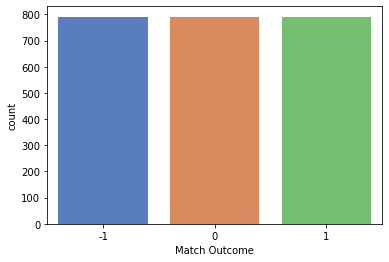

In [709]:
sns.countplot(x = y_resampled, palette='muted')

---


---

---
#### **SECOND TYPE DE PREDICTION:**

***On fournit toutes les statistiques des équipes et on essaye de prédire l'issue sans donner les stats du match courant***

---

In [521]:
# Créer une copie de dfteams pour chaque équipe à domicile et visiteur
home_teams = dfteams.copy().add_prefix('HT ')
away_teams = dfteams.copy().add_prefix('AT ')

# Renommer la colonne Team pour correspondre à Home Team et Away Team respectivement
home_teams = home_teams.rename(columns={'Team': 'Home Team'})
away_teams = away_teams.rename(columns={'Team': 'Away Team'})

# Fusionner les données de chaque équipe avec le dataframe matches
matches = pd.merge(matchs, home_teams, on='Home Team')
matches = pd.merge(matches, away_teams, on='Away Team')


KeyError: 'Home Team'

In [532]:
f=['season', 'Home Team', 'Away Team', 'Home Average Posses', 'Home Average Goals Scored',
       'Home Average Goals Conceeded', 'Home Average xG', 'Home Average NSxG',
       'Home Average TotShots', 'Home Average OffT Shots',
       'Home Average OnT Shots', 'Home Average Block Shots',
       'Home Average Pass %', 'Home Average Corners', 'Home Average Throw Ins',
       'Home Average Aerials Won', 'Home Average Clear', 'Home Average Fouls',
       'Home Average YellowC', 'Home Average SecYellowC', 'Home Average RedC',
       'Home Average Importance', 'Home Average ProjScore',
       'Home Average AdjScore', 'Home Average SPI Rate',
       'Home Average ProbWin', 'Home Average Rating',
       'Home Average Match Outcome', 'Home Average Score Difference',
       'Away Average Posses', 'Away Average Goals Scored',
       'Away Average Goals Conceeded', 'Away Average xG', 'Away Average NSxG',
       'Away Average TotShots', 'Away Average OffT Shots',
       'Away Average OnT Shots', 'Away Average Block Shots',
       'Away Average Pass %', 'Away Average Corners', 'Away Average Throw Ins',
       'Away Average Aerials Won', 'Away Average Clear', 'Away Average Fouls',
       'Away Average YellowC', 'Away Average SecYellowC', 'Away Average RedC',
       'Away Average Importance', 'Away Average ProjScore',
       'Away Average AdjScore', 'Away Average SPI Rate',
       'Away Average ProbWin', 'Away Average Rating',
       'Away Average Match Outcome', 'Away Average Score Difference'
        ]

In [533]:
X_train, X_test, y_train, y_test = train_test_split(matches[f], matches["Match Outcome"], test_size=0.21, random_state=42)

clf = RandomForestClassifier(random_state=2, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features="log2", bootstrap=True)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

importances = pd.Series(clf.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)

print(importances*100)

Précision : 50.88%
season                           6.137768
Home Average Score Difference    2.552891
Away Average Rating              2.498303
Home Average Match Outcome       2.381514
Away Average SPI Rate            2.366761
Home Average ProjScore           2.350903
Home Average ProbWin             2.202277
Away Average Match Outcome       2.178191
Away Average Score Difference    2.104494
Away Average xG                  2.086467
dtype: float64


In [534]:
from sklearn.model_selection import GridSearchCV

# on défini les paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# on entraîne le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# meilleurs paramètres trouvés
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))


{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Précision : 52.63%


In [538]:
X_train, X_test, y_train, y_test = train_test_split(matches[f], matches["Match Outcome"], test_size=0.21, random_state=42)

clf = RandomForestClassifier(random_state=2, n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features="log2", bootstrap=True)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_pred2 = clf.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision : {:.2f}%".format(accuracy * 100))

importances = pd.Series(clf.feature_importances_, index=X_test.columns).sort_values(ascending=False).head(10)
print(importances*100)

Précision : 52.63%
season                           2.996498
Away Average Rating              2.973307
Home Average Match Outcome       2.725859
Away Average Score Difference    2.636558
Home Average ProjScore           2.625265
Home Average Score Difference    2.606208
Away Average OnT Shots           2.546101
Away Average xG                  2.484101
Away Average Match Outcome       2.425679
Away Average TotShots            2.369122
dtype: float64


In [558]:
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Définir la stratégie de validation croisée
cv = TimeSeriesSplit(n_splits=5)

# Créer un objet RandomOverSampler pour rééquilibrer les classes
ros = RandomOverSampler(random_state=42)

# Appliquer le rééquilibrage sur l'ensemble d'entraînement
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Entraîner un nouveau modèle RandomForest sur les données rééquilibrées
clf = RandomForestClassifier(random_state=2, n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features="log2", bootstrap=True)

# Effectuer une cross-validation avec la stratégie de validation croisée chronologique et le modèle entraîné sur les données rééquilibrées
scores = cross_val_score(clf, X_resampled, y_resampled, cv=cv)

# Afficher les scores de chaque fold de la validation croisée
print("Scores de la validation croisée chronologique : {}".format(scores))

# Afficher la précision moyenne de la validation croisée
print("Précision moyenne de la validation croisée chronologique : {:.2f}%".format(scores.mean() * 100))

Scores de la validation croisée chronologique : [0.50442478 0.53687316 0.51032448 0.66961652 0.21828909]
Précision moyenne de la validation croisée chronologique : 48.79%


In [582]:
# Charger les données des confrontations
matchups_df = matchs

# Charger les données des statistiques des équipes
stats_df = dfteams

# Regrouper les données de chaque équipe en un seul dataframe
team_stats_dict = {}
for i, row in stats_df.iterrows():
    # Créer un dictionnaire des statistiques pour chaque équipe
    # La clé est le nom de l'équipe et la valeur est un dictionnaire des statistiques
    team_stats_dict[row["Team"]] = row.iloc[0:].to_dict()

# Fonction pour créer les features pour chaque confrontation
def create_matchup_features(matchup_row):
    # Récupérer les statistiques pour chaque équipe
    team_1_stats = team_stats_dict[matchup_row["Home Team"]]
    team_2_stats = team_stats_dict[matchup_row["Away Team"]]
    
    # Créer une liste de features en combinant les statistiques des deux équipes
    matchup_features = []
    for stat in team_1_stats.keys():
        matchup_features.append(team_1_stats[stat])
        matchup_features.append(team_2_stats[stat])
    
    return matchup_features

# Créer les features pour chaque confrontation
matchup_features_list = []
for i, row in matchups_df.iterrows():
    matchup_features = create_matchup_features(row)
    matchup_features_list.append(matchup_features)
    
# Créer un dataframe à partir de la liste de features
match_features = pd.DataFrame(matchup_features_list)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(match_features, matchups_df["Match Outcome"], test_size=0.2,random_state=42 )

# Créer un modèle de classification
clf = RandomForestClassifier(random_state=3, n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features="log2", bootstrap=True)

# Entraîner le modèle de classification
clf.fit(X_train, y_train)

# Utiliser le modèle de classification pour prédire l'issue du match
team_1 = get_team("MANCHESTER CITY")
team_2 = get_team("TOTTENHAM")
team_1_stats = team_stats_dict[team_1]
team_2_stats = team_stats_dict[team_2]

# Créer une liste de features pour le match à prédire en combinant les statistiques des deux équipes
matchup_features = []
for stat in team_1_stats.keys():
    matchup_features.append(team_1_stats[stat])
    matchup_features.append(team_2_stats[stat])

# Prédire l'issue du match
predicted_winner = clf.predict(pd.DataFrame([matchup_features]))

# Utiliser le modèle de classification pour prédire la probabilité de chaque classe
proba = clf.predict_proba(pd.DataFrame([matchup_features]))

# Afficher les probabilités de victoire pour chaque équipe et la probabilité de match nul
print(f"Probabilité de victoire de {get_team(team_1)} : {proba[0][2]:.2f}")
print(f"Probabilité de victoire de  {get_team(team_2)} : {proba[0][0]:.2f}")
print(f"Probabilité de match nul : {proba[0][1]:.2f}")

# Obtenir le résultat réel du match
real_outcome = matchups_df[(matchups_df["Home Team"] == team_1)&(matchups_df["Away Team"] == team_2)]["Match Outcome"].values

# Afficher le résultat réel du match
if predicted_winner == 1:
    print(f"On prédit que le match entre  {get_team(team_1)} et {get_team(team_2)} va être remporté par {get_team(team_1)}")
elif predicted_winner == -1:
    print(f"On prédit que le match entre {get_team(team_1)} et  {get_team(team_2)} va être remporté par {get_team(team_2)}")
else:
    print(f"On prédit que le match entre {get_team(team_1)} et {get_team(team_2)} va se terminer sur un match nul")

h = 0
a = 0
n = 0
for outcome in list(real_outcome):
   
    if outcome == 1:
        h +=1
    elif outcome == -1:
        a +=1
    else:
        n +=1
print(f"Les confrontations entre {get_team(team_1)} et {get_team(team_2)} ont donné {h} victoires pour {get_team(team_1)}, {a} victoires pour {get_team(team_2)} et {n} matchs nuls")
    


Probabilité de victoire de MANCHESTER CITY : 0.65
Probabilité de victoire de  TOTTENHAM : 0.04
Probabilité de match nul : 0.31
On prédit que le match entre  MANCHESTER CITY et TOTTENHAM va être remporté par MANCHESTER CITY
Les confrontations entre MANCHESTER CITY et TOTTENHAM ont donné 3 victoires pour MANCHESTER CITY, 0 victoires pour TOTTENHAM et 2 matchs nuls


In [583]:
clf.score(X_test, y_test)

0.5394736842105263